In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [2]:
df = pd.read_csv('D:/大数据课程开发设计/breast-cancer.csv', encoding='gbk')#读取数据
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
267,50-59,ge40,30-34,6-8,True,2,left,left_low,False,false-recurrence-events
268,50-59,premefalse,25-29,3-5,True,2,left,left_low,True,false-recurrence-events
269,30-39,premefalse,30-34,6-8,True,2,right,right_up,False,false-recurrence-events
270,50-59,premefalse,15-19,0-2,False,2,right,left_low,False,false-recurrence-events


In [3]:
data=df.isnull().any()##检查缺失值所在的列
data

age             False
mefalsepause    False
tumor-size      False
inv-falsedes    False
falsede-caps     True
deg-malig       False
breast          False
breast-quad      True
irradiat        False
class           False
dtype: bool

In [4]:
###用众数对缺失数值进行填充
df['falsede-caps']=df['falsede-caps'].fillna(df['falsede-caps'].mode()[0])
df['breast-quad']=df['breast-quad'].fillna(df['breast-quad'].mode()[0])
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
267,50-59,ge40,30-34,6-8,True,2,left,left_low,False,false-recurrence-events
268,50-59,premefalse,25-29,3-5,True,2,left,left_low,True,false-recurrence-events
269,30-39,premefalse,30-34,6-8,True,2,right,right_up,False,false-recurrence-events
270,50-59,premefalse,15-19,0-2,False,2,right,left_low,False,false-recurrence-events


In [5]:
###检查是否填充完成
data1=df.isnull().any()
data1

age             False
mefalsepause    False
tumor-size      False
inv-falsedes    False
falsede-caps    False
deg-malig       False
breast          False
breast-quad     False
irradiat        False
class           False
dtype: bool

In [6]:
####对部分列进行数值型替换
df1=df
df1['falsede-caps'].replace([True,False],[1,0],inplace=True)
df1['breast-quad'].replace(['left_up','left_low','central','right_up','right_low'],[0,1,2,3,4],inplace=True)
df1['irradiat'].replace([True,False],[1,0],inplace=True)
df1['class'].replace(['false-recurrence-events','recurrence-events'],[1,0],inplace=True)
df1['breast'].replace(['right','left'],[1,0],inplace=True)
df1

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,1,3,1,0,0,0
1,50-59,ge40,15-19,0-2,0,1,1,2,0,1
2,50-59,ge40,35-39,0-2,0,2,0,1,0,0
3,40-49,premefalse,35-39,0-2,1,3,1,1,1,1
4,40-49,premefalse,30-34,3-5,1,2,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...
267,50-59,ge40,30-34,6-8,1,2,0,1,0,1
268,50-59,premefalse,25-29,3-5,1,2,0,1,1,1
269,30-39,premefalse,30-34,6-8,1,2,1,3,0,1
270,50-59,premefalse,15-19,0-2,0,2,1,1,0,1


In [7]:
###转换age列
print(df1['age'].unique())
df1['age']=df1['age'].apply(lambda x:int(x[:2])+5)

['40-49' '50-59' '60-69' '30-39' '70-79' '20-29']


In [8]:
df1['age'].value_counts()

55    91
45    87
65    53
35    34
75     6
25     1
Name: age, dtype: int64

<AxesSubplot:>

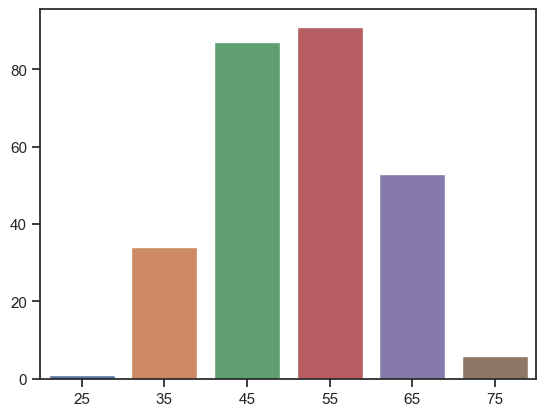

In [16]:
###年龄分布可视化
count_number_susbc = df1["age"].value_counts()
sns.barplot(x=count_number_susbc.index, y=count_number_susbc.values)

30-34    60
25-29    51
20-24    47
15-19    26
10-14    26
40-44    21
35-39    18
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64

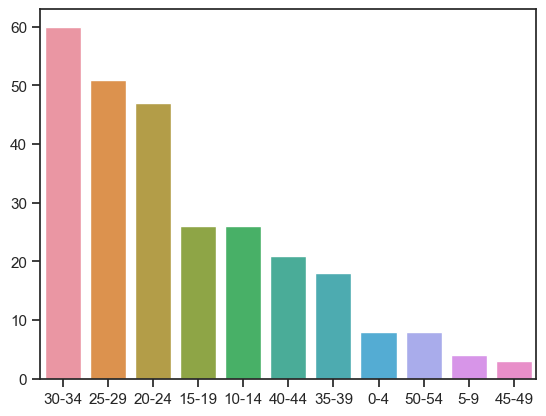

In [17]:
###肿瘤大小可视化
count_number_susbc = df1["tumor-size"].value_counts()
sns.barplot(x=count_number_susbc.index, y=count_number_susbc.values)
df1["tumor-size"].value_counts()

1    191
0     81
Name: class, dtype: int64

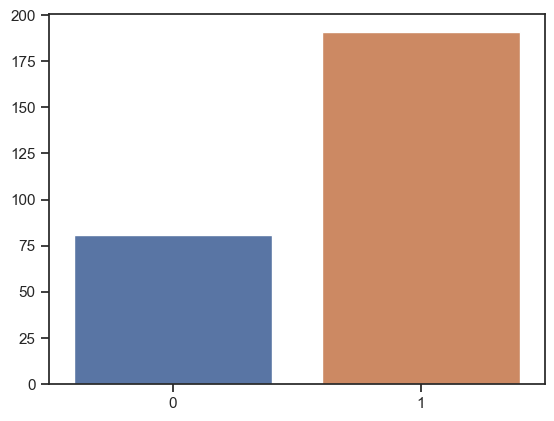

In [18]:
####种类可视化
count_number_susbc = df1["class"].value_counts()
sns.barplot(x=count_number_susbc.index, y=count_number_susbc.values)
df1["class"].value_counts()

Text(0.5, 1.0, 'Relationship between age and illness')

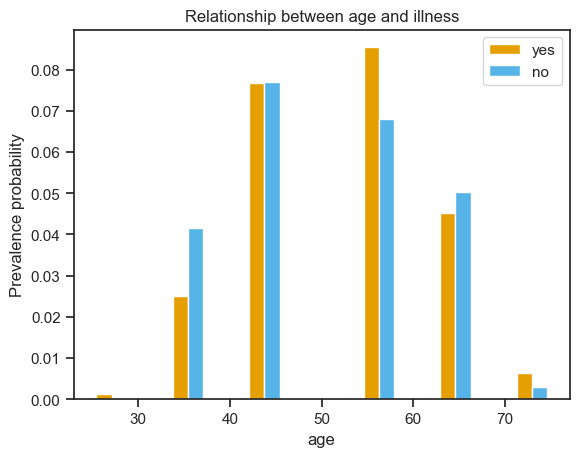

In [24]:
from pylab import *
x1 = list(df1[df1['class'] == 1]['age'])
x2 = list(df1[df1['class'] == 0]['age'])

# assign colors for each subscription type 
colors = ['#E69F00', '#56B4E9']
names = ['yes', 'no']

# plot the histogram
plt.hist([x1, x2], bins = int(180/15), density=True,
         color = colors, label=names)

# plot formatting
plt.legend()
plt.xlabel('age')
plt.ylabel('Prevalence probability')
plt.title('Relationship between age and illness')


<AxesSubplot:xlabel='age'>

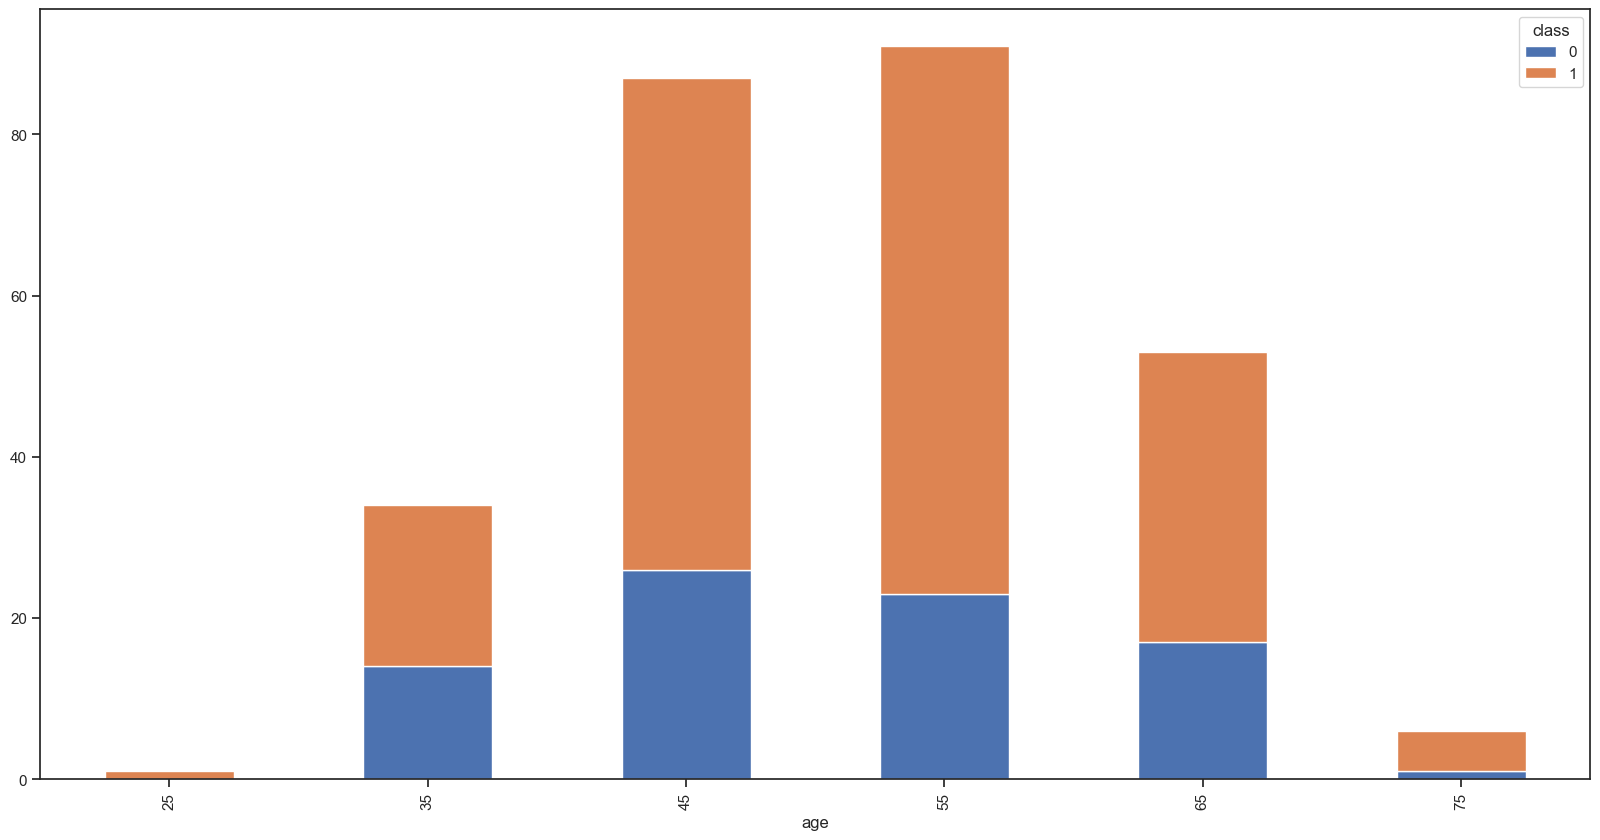

In [25]:
df.groupby(["age", "class"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

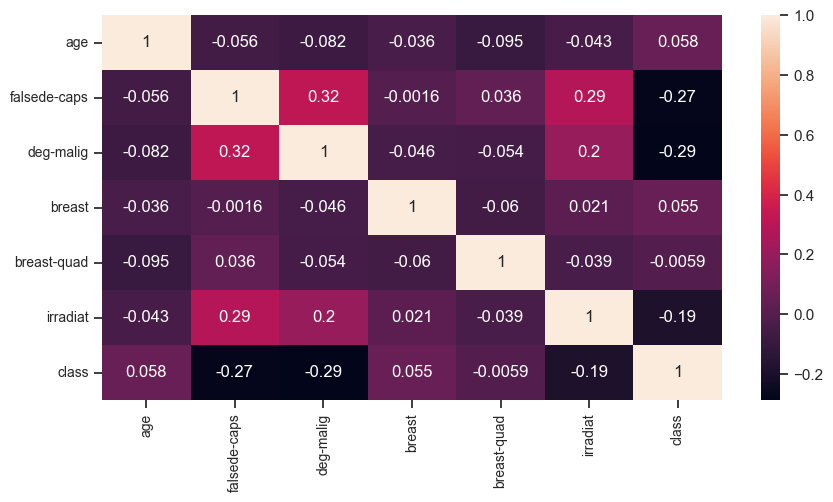

In [26]:
###自变量的相关性
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns.values, yticklabels=corr_df.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf(); heat_map.set_size_inches(10,5)
plt.xticks(fontsize=10); plt.yticks(fontsize=10); plt.show()

In [28]:
####变量的重要性

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import boruta

# transform all categorical data types to integers (hot-encoding)
for col_name in df1.columns:
    if(df1[col_name].dtype == 'object'):
        df1[col_name]= df1[col_name].astype('category')
        df1[col_name] = df1[col_name].cat.codes

# generate separate dataframes for IVs and DV (target variable)
X = df1.drop(['class'], axis=1).values
Y = df1['class'].values

# build RandomForestClassifier, Boruta models and
# related parameter
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
n_train = len(X)

# fit Boruta algorithm
boruta_selector.fit(X, Y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	6
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=40, n_jobs=4,
                                          random_state=RandomState(MT19937) at 0x26C0E41F158),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x26C0E41F158, verbose=2)

,features,rank
0,tumor-size,1
1,inv-falsedes,1
2,deg-malig,1
3,breast-quad,2
4,falsede-caps,3
5,age,4
6,irradiat,5
7,mefalsepause,6
8,breast,7


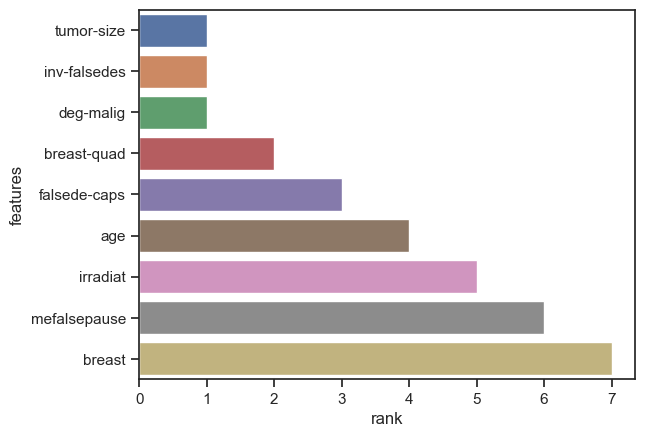

In [29]:
feature_df = pd.DataFrame(df.drop(['class'], axis=1).columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
sns.barplot(x='rank',y='features',data=feature_df)
feature_df